# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import warnings
import math
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore') #ignora os avisos


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree 

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import plot_roc_curve

# Importação dos dados

In [ ]:
url = 'https://raw.githubusercontent.com/renanmath/Bootcamp_Projeto_Final/main/Dados/dados_resumidos_UTI'

In [ ]:
dados_resumidos = pd.read_csv(url)
dados_resumidos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,...,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,WINDOW,ICU
0,0,1,0.6,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.317073,-0.317073,-0.317073,-0.317073,0.183673,0.183673,0.183673,0.183673,-0.891993,-0.891993,-0.891993,-0.891993,0.090147,0.090147,0.090147,0.090147,0.109756,0.109756,0.109756,0.109756,1.000000,1.000000,1.000000,1.000000,-0.835844,-0.835844,-0.835844,...,-0.518519,-0.518519,-0.518519,0.345679,0.345679,0.345679,0.345679,-0.028571,-0.028571,-0.028571,-0.028571,-0.836145,-0.836145,-0.836145,-0.836145,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,0-2,1
2,2,0,0.1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.317073,-0.317073,-0.317073,-0.317073,0.357143,0.357143,0.357143,0.357143,-0.780261,-0.780261,-0.780261,-0.780261,0.144654,0.144654,0.144654,0.144654,0.158537,0.158537,0.158537,0.158537,1.000000,1.000000,1.000000,1.000000,-0.382773,-0.382773,-0.382773,...,-0.703704,-0.703704,-0.703704,0.345679,0.345679,0.345679,0.345679,0.085714,0.085714,0.085714,0.085714,-0.836145,-0.836145,-0.836145,-0.836145,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,0-2,1
3,3,0,0.4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.317073,-0.317073,-0.317073,-0.317073,0.326531,0.326531,0.326531,0.326531,-0.891993,-0.891993,-0.891993,-0.891993,-0.203354,-0.203354,-0.203354,-0.203354,-0.219512,-0.219512,-0.219512,-0.219512,-0.828421,-0.828421,-0.828421,-0.828421,-0.729239,-0.729239,-0.729239,...,-0.777778,-0.777778,-0.777778,0.580247,0.580247,0.580247,0.580247,0.200000,0.200000,0.200000,0.200000,-0.937349,-0.937349,-0.937349,-0.937349,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,0-2,0
4,4,0,0.1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.317073,-0.317073,-0.317073,-0.317073,0.357143,0.357143,0.357143,0.357143,-0.851024,-0.851024,-0.851024,-0.851024,0.358491,0.358491,0.358491,0.358491,0.304878,0.304878,0.304878,0.304878,1.000000,1.000000,1.000000,1.000000,-0.702202,-0.702202,-0.702202,...,-0.592593,-0.592593,-0.592593,0.345679,0.345679,0.345679,0.345679,0.142857,0.142857,0.142857,0.142857,-0.903614,-0.903614,-0.903614,-0.903614,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,-0.076923,-0.351351

In [ ]:
dados_limpos = dados_resumidos.drop(['PATIENT_VISIT_IDENTIFIER', 'WINDOW', 'AGE_ABOVE65', 'GENDER'], axis = 1)
dados_limpos.head()

,AGE_PERCENTIL,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,...,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,ICU
0,0.6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.317073,-0.317073,-0.317073,-0.317073,0.183673,0.183673,0.183673,0.183673,-0.891993,-0.891993,-0.891993,-0.891993,0.090147,0.090147,0.090147,0.090147,0.109756,0.109756,0.109756,0.109756,1.000000,1.000000,1.000000,1.000000,-0.835844,-0.835844,-0.835844,-0.835844,-0.914938,-0.914938,...,-0.518519,-0.518519,-0.518519,-0.518519,0.345679,0.345679,0.345679,0.345679,-0.028571,-0.028571,-0.028571,-0.028571,-0.836145,-0.836145,-0.836145,-0.836145,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,1
2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.317073,-0.317073,-0.317073,-0.317073,0.357143,0.357143,0.357143,0.357143,-0.780261,-0.780261,-0.780261,-0.780261,0.144654,0.144654,0.144654,0.144654,0.158537,0.158537,0.158537,0.158537,1.000000,1.000000,1.000000,1.000000,-0.382773,-0.382773,-0.382773,-0.382773,-0.908714,-0.908714,...,-0.703704,-0.703704,-0.703704,-0.703704,0.345679,0.345679,0.345679,0.345679,0.085714,0.085714,0.085714,0.085714,-0.836145,-0.836145,-0.836145,-0.836145,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,1
3,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.317073,-0.317073,-0.317073,-0.317073,0.326531,0.326531,0.326531,0.326531,-0.891993,-0.891993,-0.891993,-0.891993,-0.203354,-0.203354,-0.203354,-0.203354,-0.219512,-0.219512,-0.219512,-0.219512,-0.828421,-0.828421,-0.828421,-0.828421,-0.729239,-0.729239,-0.729239,-0.729239,-0.836100,-0.836100,...,-0.777778,-0.777778,-0.777778,-0.777778,0.580247,0.580247,0.580247,0.580247,0.200000,0.200000,0.200000,0.200000,-0.937349,-0.937349,-0.937349,-0.937349,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,0
4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.317073,-0.317073,-0.317073,-0.317073,0.357143,0.357143,0.357143,0.357143,-0.851024,-0.851024,-0.851024,-0.851024,0.358491,0.358491,0.358491,0.358491,0.304878,0.304878,0.304878,0.304878,1.000000,1.000000,1.000000,1.000000,-0.702202,-0.702202,-0.702202,-0.702202,-0.641079,-0.641079,...,-0.592593,-0.592593,-0.592593,-0.592593,0.345679,0.345679,0.345679,0.345679,0.142857,0.142857,0.142857,0.142857,-0.903614,-0.903614,-0.903614,-0.903614,0.333333,-0.153846,0.160377,-0.59322

# GridSearch

## Criação de variáveis

In [ ]:
features_continuas = dados_limpos.columns[10:-1].tolist()
features_categoricas = dados_limpos.columns[0:9].tolist()

In [ ]:
X = dados_limpos.drop('ICU', axis = 1)
y = dados_limpos['ICU']

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size = 0.25, stratify = y, random_state = 527435)

## LogisticRegression

In [ ]:
modelo_log_reg = LogisticRegression(random_state=527435)

In [ ]:
modelo_log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=527435, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
parametros_log_reg = {'class_weight' : (None, 'balanced'),
              'solver' : ('lbfgs', 'liblinear'),
              'fit_intercept' : (True, False),
              'C': [1.0,1.5,2.0,2.5,3.0],
              'max_iter' : [10*x for x in range(5,101)],
              'tol' : [0.0001,0.001,0.01, 0.1,1.0]
    
}

In [ ]:
clf_log_reg = GridSearchCV(modelo_log_reg,parametros_log_reg, scoring= 'roc_auc')

In [ ]:
clf_log_reg.fit(X_treino,y_treino)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=527435, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 1.5, 2.0, 2.5, 3.0],
                         'class_weight': (None, 'balanced'),
                         'fit_intercept': (True, False),
                         'max_iter': [50, 60, 70, 80, 90, 100, 110, 120, 130,
                                      140, 150, 160, 170, 180, 190, 200, 210,
                

In [ ]:
modelo_log_reg = clf_log_reg.best_estimator_
modelo_log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=527435, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
clf_log_reg.best_params_

{'C': 1.0,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 50,
 'solver': 'lbfgs',
 'tol': 0.1}

Melhores parâmetros:

{'C': 1.0,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 50,
 'solver': 'lbfgs',
 'tol': 0.1}

In [ ]:
clf_log_reg.best_score_

0.7941633825944171

In [ ]:
y_pred_log_reg = clf_log_reg.predict(X_teste)

In [ ]:
print(classification_report(y_teste,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69        47
           1       0.65      0.63      0.64        41

    accuracy                           0.67        88
   macro avg       0.67      0.67      0.67        88
weighted avg       0.67      0.67      0.67        88



In [ ]:
modelo_log_reg.fit(X_treino, y_treino)
y_pred_log_reg = modelo.predict(X_teste)
acur = modelo_log_reg.score(X_teste, y_teste)
print(f"Acurácia = {round(100*acur, 2)}%")

Acurácia = 67.05%


In [ ]:
print(classification_report(y_teste,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        47
           1       0.73      0.80      0.77        41

    accuracy                           0.77        88
   macro avg       0.77      0.77      0.77        88
weighted avg       0.78      0.77      0.77        88



In [ ]:
print(classification_report(y_treino,modelo_log_reg.predict(X_treino)))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       142
           1       0.78      0.75      0.77       121

    accuracy                           0.79       263
   macro avg       0.79      0.79      0.79       263
weighted avg       0.79      0.79      0.79       263



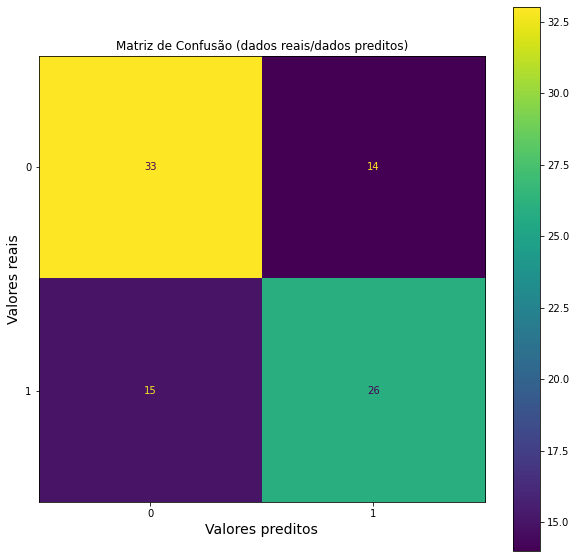

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(modelo_log_reg, X_teste, y_teste, ax=ax)

plt.title('Matriz de Confusão (dados reais/dados preditos)')
plt.ylabel('Valores reais',fontsize=14)
plt.xlabel('Valores preditos',fontsize=14)
plt.show()

## RandomForest

In [ ]:
modelo_forest = RandomForestClassifier(random_state=527435)

In [ ]:
modelo_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=527435,
                       verbose=0, warm_start=False)

In [ ]:
parametros_forest = {'class_weight' : ('balanced', 'balanced_subsample'),
              'criterion' : ('gini', 'entropy'),
              'max_depth': [None,5,10,15,20,25,30],
              'max_features': ['auto', 'log2', None],
              'max_samples' : [None, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    
}

In [ ]:
clf_forest = GridSearchCV(modelo_forest,parametros_forest, scoring= 'roc_auc')

In [ ]:
clf_forest.fit(X_treino,y_treino)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              warm_start=False),
             iid='deprecated', n_jobs=None,
  

In [ ]:
melhor_modelo_forest = clf_forest.best_estimator_
melhor_modelo_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=15, max_features='log2', max_leaf_nodes=None,
                       max_samples=0.6, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=527435, verbose=0, warm_start=False)

In [ ]:
melhor_modelo_forest.fit(X_treino,y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=15, max_features='log2', max_leaf_nodes=None,
                       max_samples=0.6, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=527435, verbose=0, warm_start=False)

In [ ]:
modelo_floresta = RandomForestClassifier(class_weight= 'balanced_subsample',
                                         criterion = 'gini',
                                         max_depth = 15,
                                         max_features = 'log2',
                                         max_samples = 0.6,
                                         random_state = 527435)

In [ ]:
clf_forest.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'max_samples': 0.6}

Melhores parâmetros:


{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'max_samples': 0.6}

In [ ]:
clf_forest.best_score_

0.8286915024630541

In [ ]:
modelo_floresta.fit(X_treino,y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=15, max_features='log2', max_leaf_nodes=None,
                       max_samples=0.6, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=527435, verbose=0, warm_start=False)

In [ ]:
y_pred_forest = modelo_floresta.predict(X_teste)

In [ ]:
y_pred_forest = melhor_modelo_forest.predict(X_teste)

In [ ]:
print(classification_report(y_teste,y_pred_forest))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        47
           1       0.66      0.66      0.66        41

    accuracy                           0.68        88
   macro avg       0.68      0.68      0.68        88
weighted avg       0.68      0.68      0.68        88



In [ ]:
modelo = clf.best_estimator_
modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_teste)
acur = modelo.score(X_teste, y_teste)
print(f"Acurácia = {round(100*acur, 2)}%")

Acurácia = 78.3%


In [ ]:
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        57
           1       0.78      0.73      0.76        49

    accuracy                           0.78       106
   macro avg       0.78      0.78      0.78       106
weighted avg       0.78      0.78      0.78       106



In [ ]:
print(classification_report(y_treino,modelo.predict(X_treino)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       132
           1       0.96      0.96      0.96       113

    accuracy                           0.96       245
   macro avg       0.96      0.96      0.96       245
weighted avg       0.96      0.96      0.96       245



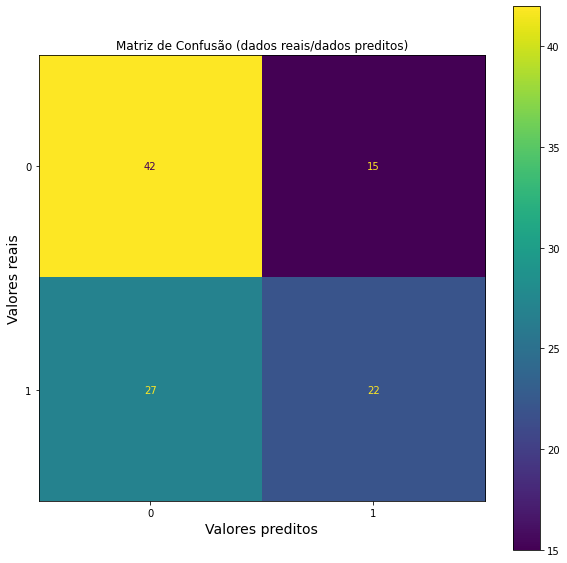

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(modelo, X_teste, y_teste, ax=ax)

plt.title('Matriz de Confusão (dados reais/dados preditos)')
plt.ylabel('Valores reais',fontsize=14)
plt.xlabel('Valores preditos',fontsize=14)
plt.show()

## XGBClassifier

In [ ]:
modelo_xgb = XGBClassifier(random_state=527435)

In [ ]:
parametros_xgb = {'booster' : ['gbtree', 'gblinear','dart'],
              'eta' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
              'max_depth': [1,5,10,15,20,25,30],
              'subsample': [0.2, 0.5, 0.7, 1.0],
              'sampling_method' : ['uniform', 'gradient_based']
    
}

In [ ]:
clf_xgb = GridSearchCV(modelo_xgb,parametros_xgb, scoring= 'roc_auc')

In [ ]:
clf_xgb.fit(X_treino,y_treino)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=527435, reg_alpha=0,
                                     reg_lambda=1,...
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'eta': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
   

In [ ]:
melhor_modelo_xgb = clf_xgb.best_estimator_
melhor_modelo_xgb

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=527435,
              reg_alpha=0, reg_lambda=1, sampling_method='uniform',
              scale_pos_weight=1, seed=None, silent=None, subsample=0.7,
              verbosity=1)

In [ ]:
clf_xgb.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'max_depth': 5,
 'sampling_method': 'uniform',
 'subsample': 0.7}

Melhores parâmetros:

{'booster': 'dart',
 'eta': 0.1,
 'max_depth': 5,
 'sampling_method': 'uniform',
 'subsample': 0.7}

In [ ]:
clf_xgb.best_score_

0.8129224137931035

In [ ]:
y_pred_xgb = melhor_modelo_xgb.predict(X_teste)

In [ ]:
print(classification_report(y_teste,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        47
           1       0.72      0.76      0.74        41

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.75      0.75      0.75        88



In [ ]:
modelo_xgb.fit(X_treino, y_treino)
y_pred_xgb = modelo_xgb.predict(X_teste)
acur = modelo_xgb.score(X_teste, y_teste)
print(f"Acurácia = {round(100*acur, 2)}%")

Acurácia = 75.0%


In [ ]:
print(classification_report(y_teste,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.79      0.72      0.76        47
           1       0.71      0.78      0.74        41

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.75      0.75      0.75        88



In [ ]:
print(classification_report(y_treino,modelo_xgb.predict(X_treino)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       142
           1       1.00      0.98      0.99       121

    accuracy                           0.99       263
   macro avg       0.99      0.99      0.99       263
weighted avg       0.99      0.99      0.99       263



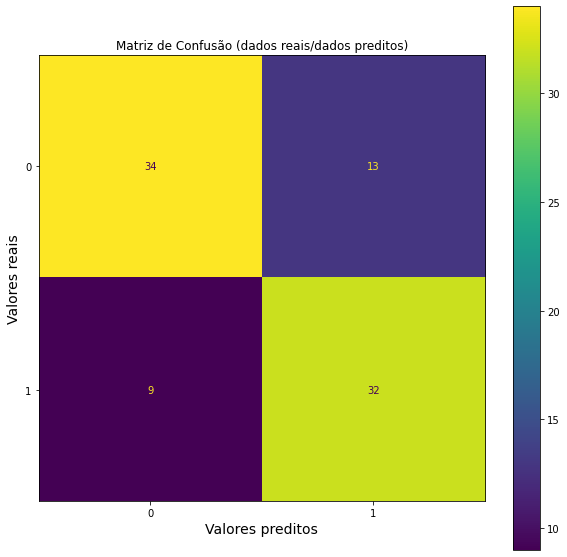

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(modelo_xgb, X_teste, y_teste, ax=ax)

plt.title('Matriz de Confusão (dados reais/dados preditos)')
plt.ylabel('Valores reais',fontsize=14)
plt.xlabel('Valores preditos',fontsize=14)
plt.show()

## KNeighborsClassifier

In [ ]:
modelo = KNeighborsClassifier()

In [ ]:
modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
parametros = {'n_neighbors' : [x for x in range(2,20)],
              'weights' : ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric': ['manhattan', 'chebyshev', 'minkowski'],
                  
}

In [ ]:
clf = GridSearchCV(modelo,parametros, scoring= 'roc_auc')

In [ ]:
clf.fit(X_treino,y_treino)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['manhattan', 'chebyshev', 'minkowski'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='distance')

In [ ]:
clf.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 14,
 'weights': 'distance'}

Melhores parâmetros:

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 14,
 'weights': 'distance'}

In [ ]:
clf.best_score_

0.7195410064975283

In [ ]:
y_pred = clf.predict(X_teste)

In [ ]:
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.91      0.75        57
           1       0.79      0.39      0.52        49

    accuracy                           0.67       106
   macro avg       0.71      0.65      0.63       106
weighted avg       0.71      0.67      0.64       106



In [ ]:
modelo = clf.best_estimator_
modelo.fit(X_treino, y_treino)
y_pred = modelo.predict(X_teste)
acur = modelo.score(X_teste, y_teste)
print(f"Acurácia = {round(100*acur, 2)}%")

Acurácia = 66.98%


In [ ]:
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.91      0.75        57
           1       0.79      0.39      0.52        49

    accuracy                           0.67       106
   macro avg       0.71      0.65      0.63       106
weighted avg       0.71      0.67      0.64       106



In [ ]:
print(classification_report(y_treino,modelo.predict(X_treino)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       113

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



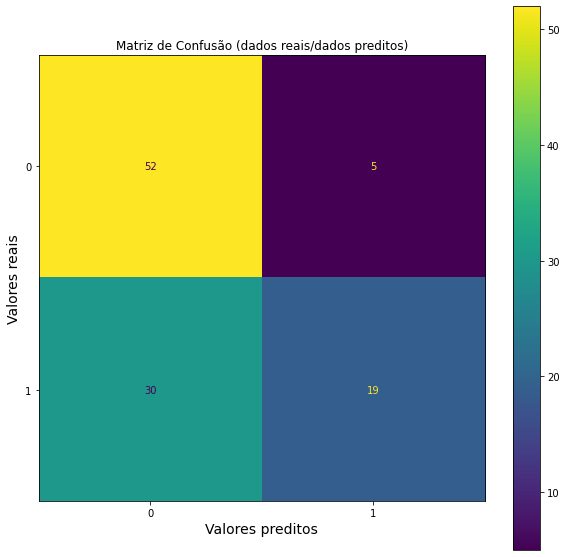

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(modelo, X_teste, y_teste, ax=ax)

plt.title('Matriz de Confusão (dados reais/dados preditos)')
plt.ylabel('Valores reais',fontsize=14)
plt.xlabel('Valores preditos',fontsize=14)
plt.show()